In [ ]:
import yfinance as yf

# Download historical gold price data using yfinance
googl_data = yf.download('GOOGL', start='2013-05-15', end='2023-05-15')

[*********************100%***********************]  1 of 1 completed


In [ ]:
googl_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-05-15,22.409910,22.932432,22.372873,22.920170,22.920170,159276564
2013-05-16,22.997997,23.022524,22.572823,22.619370,22.619370,128255616
2013-05-17,22.773273,22.860109,22.535536,22.752253,22.752253,111568320
2013-05-20,22.647648,23.038038,22.647648,22.735987,22.735987,90817092
2013-05-21,22.723223,22.814314,22.462713,22.696947,22.696947,79240680
...,...,...,...,...,...,...
2023-05-08,105.180000,107.959999,105.160004,107.769997,107.769997,26511400
2023-05-09,108.389999,110.150002,107.190002,107.349998,107.349998,36360100
2023-05-10,107.970001,112.940002,107.930000,111.750000,111.750000,63153400


In [ ]:
googl_data.shape

(2517, 6)

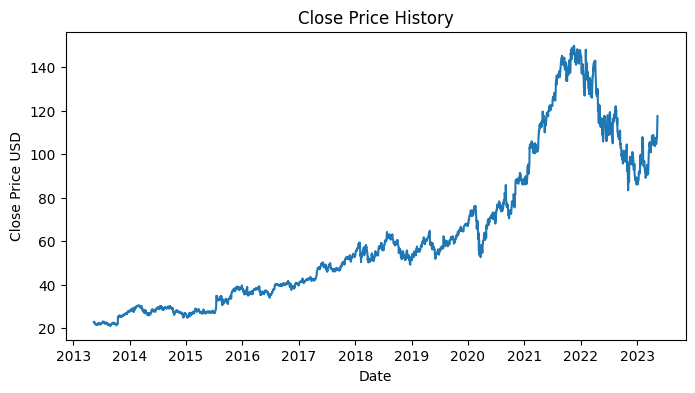

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize =(8,4))
plt.title('Close Price History')
plt.plot(googl_data['Close'])
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Close Price USD', fontsize = 10)
plt.show()

In [ ]:
import math
data = googl_data.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2014

In [ ]:
dataset

array([[ 22.92016983],
       [ 22.61936951],
       [ 22.75225258],
       ...,
       [111.75      ],
       [116.56999969],
       [117.51000214]])

In [ ]:
data

,Close
Date,
2013-05-15,22.920170
2013-05-16,22.619370
2013-05-17,22.752253
2013-05-20,22.735987
2013-05-21,22.696947
...,...
2023-05-08,107.769997
2023-05-09,107.349998
2023-05-10,111.750000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01342049],
       [0.01108227],
       [0.01211521],
       ...,
       [0.70392508],
       [0.74139258],
       [0.74869954]])

In [ ]:
train_data = scaled_data[0:training_data_len , :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.01342049, 0.01108227, 0.01211521, 0.01198877, 0.01168531,
       0.00827133, 0.00698162, 0.00513943, 0.00668594, 0.00416484,
       0.00464144, 0.00473092, 0.00403256, 0.00237324, 0.00248996,
       0.00345094, 0.00638635, 0.00842697, 0.00640192, 0.00487877,
       0.0058553 , 0.00547402, 0.00765469, 0.01045005, 0.01046172,
       0.00736094, 0.0066198 , 0.00445276, 0.0037544 , 0.00520363,
       0.00586893, 0.00651085, 0.00797176, 0.00688825, 0.00768971,
       0.00906307, 0.0113196 , 0.01134877, 0.01149467, 0.0142667 ,
       0.01480359, 0.01513234, 0.01414414, 0.01393794, 0.012407  ,
       0.00966805, 0.0124109 , 0.01106866, 0.01089357, 0.00793674,
       0.00747961, 0.00688046, 0.00856313, 0.00794647, 0.01115035,
       0.0116075 , 0.01130209, 0.00966222, 0.00851062, 0.00890161])]
[0.008463928728319109]



In [ ]:
import numpy as np

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1954, 60, 1)

In [ ]:
#Build model
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer = 'adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size =1, epochs= 20)

Epoch 1/20
1954/1954 [==============================] - 27s 10ms/step - loss: 7.6546e-04
Epoch 2/20
1954/1954 [==============================] - 14s 7ms/step - loss: 3.0559e-04
Epoch 3/20
1954/1954 [==============================] - 14s 7ms/step - loss: 3.4632e-04
Epoch 4/20
1954/1954 [==============================] - 14s 7ms/step - loss: 1.6985e-04
Epoch 5/20
1954/1954 [==============================] - 14s 7ms/step - loss: 1.8808e-04
Epoch 6/20
1954/1954 [==============================] - 15s 7ms/step - loss: 1.6544e-04
Epoch 7/20
1954/1954 [==============================] - 15s 8ms/step - loss: 1.5646e-04
Epoch 8/20
1954/1954 [==============================] - 14s 7ms/step - loss: 1.3201e-04
Epoch 9/20
1954/1954 [==============================] - 17s 9ms/step - loss: 1.5969e-04
Epoch 10/20
1954/1954 [==============================] - 15s 8ms/step - loss: 1.2083e-04
Epoch 11/20
1954/1954 [==============================] - 14s 7ms/step - loss: 1.3879e-04
Epoch 12/20
1954/1954 [======

In [ ]:
#Create the testing dataset
test_data = scaled_data[training_data_len-60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 1s 4ms/step


In [ ]:
#Get the Root Mean Squared Error
rmse =np.sqrt(np.mean(((predictions - y_test)**2))) 
rmse

2.74442003978032

<ipython-input-20-4c4d70599cd5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


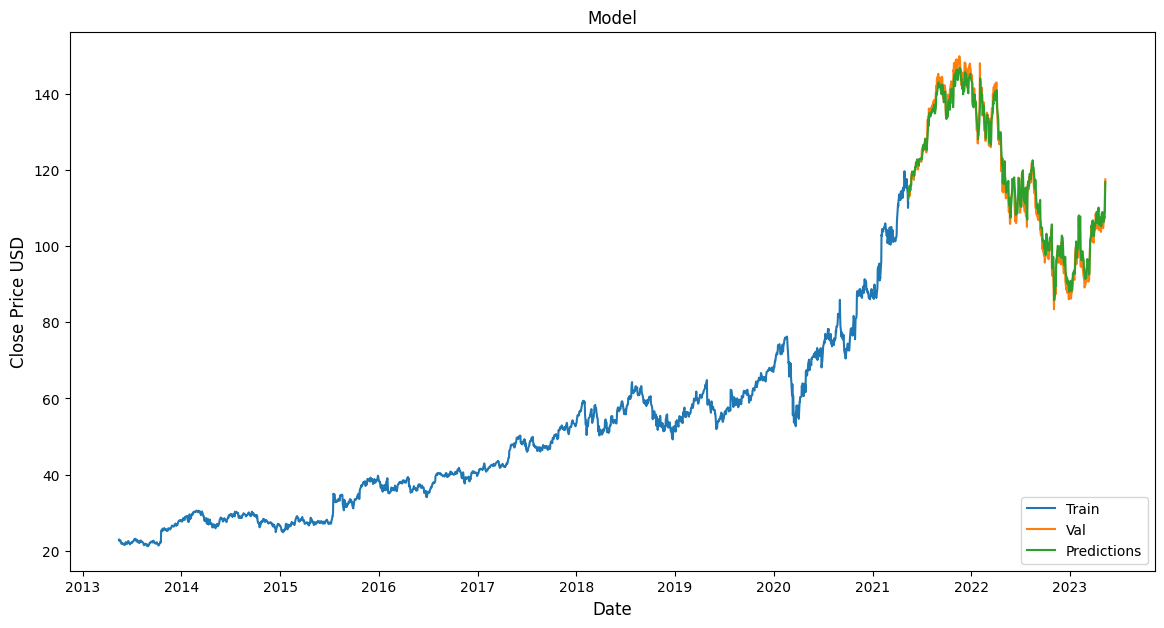

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize = (14,7))
plt.title('Model')
plt.xlabel('Date', fontsize =12)
plt.ylabel('Close Price USD',fontsize = 12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the vail and predicted prices
valid

,Close,Predictions
Date,,
2021-05-14,113.918999,112.525284
2021-05-17,114.445999,114.904282
2021-05-18,113.123497,115.759506
2021-05-19,113.574997,114.576309
2021-05-20,115.347504,114.497581
...,...,...
2023-05-08,107.769997,106.981949
2023-05-09,107.349998,108.940590
2023-05-10,111.750000,108.932152


In [ ]:
#save model
model.save("stock.h5")

In [ ]:
#load model
from tensorflow.keras.models import load_model
model_RNN=load_model('stock.h5')

In [ ]:
#Get the quote
quote = yf.download('GOOGL', start='2013-05-15', end='2023-05-15')
#Create a dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an emty list
xx_test = []
#append the past 60 days
xx_test.append(last_60_days_scaled)
#convert the xx_test dataset to a numpy array
xx_test = np.array(xx_test)
#reshape the data 
xx_test = np.reshape(xx_test,(xx_test.shape[0], xx_test.shape[1], 1))
#get the predicted scaled price 
pred_price =  model_RNN.predict(xx_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
pred_price = pred_price[0][0]
print(' Dự đoán giá đóng của tiếp theo là: ', pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 1s 616ms/step
 Dự đoán giá đóng của tiếp theo là:  118.1506
